In [1]:
# Kevin Richard
# Neuron training for Three-Dimensional inputs
# Sigmoid Activation

import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image


In [2]:

X = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [3, 3, 3], [2, 2, 3], [2, 3, 2]])
Y = np.array([0, 0, 0, 1, 1, 1])
weights_plot=[]
bias_plot=[]

weights = np.random.rand(X.shape[1])
epoch =6000
learning_rate = 0.1
b=0
print(weights)

def sigmoid(z):
  return 1.0/(1.0  + np.exp(-z) )

for _ in range(epoch):

    predictions = sigmoid(np.dot(X, weights) + b)

    gradient = np.dot(X.T, (predictions - Y)) / len(Y)
    gradient_bias = np.sum(predictions - Y) / len(Y)

    weights -= learning_rate * gradient
    b -= learning_rate * gradient_bias
    weights_plot.append(weights.copy())
    bias_plot.append(b)

    loss = np.mean((predictions - Y) ** 2)

predict = sigmoid(np.dot(X, weights)+b)
print(predict)
predicted=[]
X_0 = X[Y==0]
X_1 = X[Y==1]
x = X[:,0]

for i in range(len(Y)):
  if predict[i] > 0.5:
    predicted.append(1)
  else:
    predicted.append(0)


[0.15730177 0.52287401 0.04905097]
[0.25809998 0.39063463 0.30918174 0.97112816 0.93416182 0.93105403]


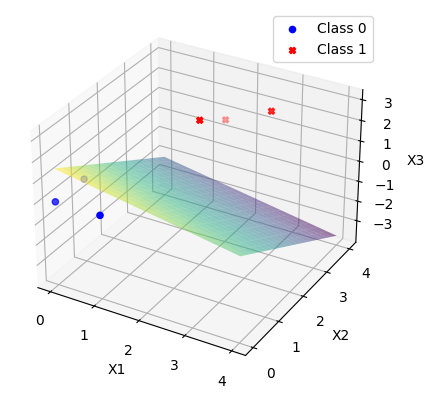

In [3]:

import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


xx, yy = np.meshgrid(np.linspace(0, 4, 20), np.linspace(0, 4, 20))

def custom_decision_boundary(x, y):
    return (-weights[0]/weights[2]) * x  -(weights[1]/weights[2]) * y - b/weights[2]

zz = custom_decision_boundary(xx, yy)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_0[:, 0], X_0[:, 1], X_0[:, 2], c='blue', marker='o', label='Class 0')
ax.scatter(X_1[:, 0], X_1[:, 1], X_1[:, 2], c='red', marker='X', label='Class 1')
ax.plot_surface(xx, yy, zz, cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()

plt.show()


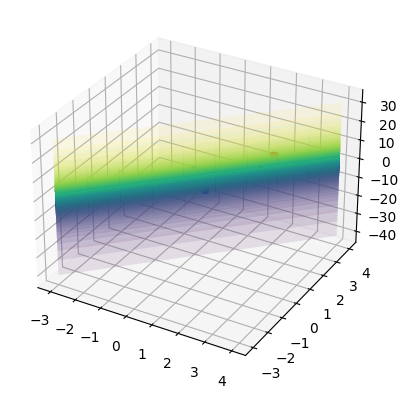

In [4]:
from IPython import display
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

line1 = np.linspace(-3, 4, 10)
line2 = np.linspace(-3, 4, 10)
fig = plt.figure() 
ax = plt.subplot(111, projection='3d')

for i in range(len(weights_plot)):
    l = []
    
    slope1, slope2, biass = -weights_plot[i][0]/weights_plot[i][2], -weights_plot[i][1]/weights_plot[i][2], -bias_plot[i]/weights_plot[i][2]
    for j in range(len(line1)):
        l.append(slope1 * line1[j] + slope2 * line2[j] + biass)
    
    Z = np.array(l)
    display.clear_output(wait=True)

    ax.scatter(X_0[:, 0], X_0[:, 1], X_0[:, 2], c='blue', marker='o')
    ax.scatter(X_1[:, 0], X_1[:, 1], X_1[:, 2], c='red', marker='X')
    ax.plot_surface(line1, line2, Z.reshape(line1.shape[0], -1), cmap='viridis', alpha=0.1, linewidth=0)


    display.display(plt.gcf())
    time.sleep(0.0001)

ax.plot_surface(line1, line2, Z.reshape(line1.shape[0], -1), cmap='viridis', alpha=1, linewidth=0)
display.display(plt.gcf())
display.clear_output(wait=True)
